# Analysis of data obtained from tensile test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
%matplotlib inline

We obtained two .xls data files containing tensile test data from publicly available [sources](
https://professorkazarinoff.github.io/Engineering-Materials-Programming/07-Mechanical-Properties/plotting-stress-strain-curves.html). They describe the measured data from testing 1045 steel and 6061 aluminum alloy.

## Načtení dat z Excelu

Nejdříve si pomocí funkce ```%ls``` ověříme, že nás adresář obsahuje data z měření. Tato funkce nám vypíše obsah adresáře.  

Pomocí funkce ```pd.read_excel()``` z balíčku pandas je možné přímo načíst data. Data ze dvou excelových souborů budou uložena ve dvou datových objektech nazvaných ```steel_df``` a ```al_df```. Datový objekt pandas je tabulkový datový typ.

K zobrazení prvních pěti řádků každého datového rámce můžeme použít metodu ```.head()```.

## Loading data from Excel

Using the ```pd.read_excel()``` function from the pandas package, it is possible to load data directly. The data from the two Excel files will be stored in two data objects called ```steel_df``` and ```al_df```. The pandas data object is a table data type.

To display the first five rows of each data frame, we can use the ```.head()``` method.

In [2]:
df_al = pd.read_excel('data/Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [3]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


We can see that the measured data contains various values. For us, the most important column is the force (**FORCE**). In addition to these values, we also have the **EXT** value of the elongation from the mechanical extensometer in \% and **CH5**, which contains the elongation from the laser extensometer in \%.

## Data editing

Because we got this data from an American laboratory, we have the force in pounds and the diameter of the test bar is 0.506 inches. First, we need to convert these values ​​to SI units.

* To convert force or mass from pounds (lb) to newtons (N), we use the following relationship: 1 lb $\approx$ 4.4822162 N.
* To convert length from inches (inch) to millimeters (mm), we use the following relationship:
1 inch = 25.4 mm.

>note
>
> Force in **N**, dimensions in **mm**, stress in **MPa**
$$1 \frac{\mathrm{N}}{\mathrm{mm}^2} = 1\,10^6 \frac{\mathrm{N}}{\mathrm{m}^2} = 1 \mathrm{MPa}$$

In [4]:
d = 0.506 * 25.4 # mm
force_al = df_al['FORCE'].to_numpy() *  4.4822162#N
force_steel = df_steel['FORCE'].to_numpy() * 4.4822162 #N

We will then determine the contractive stress by dividing the force by the initial cross-section and converting the elongation from percentages. Since the laser extensometer is more accurate, we will calculate with these data.

In [5]:
A = np.pi*d**2/4
stress_al = force_al / A
stress_steel = force_steel/A

strain_al = df_al['CH5'].to_numpy()*0.01
strain_steel = df_steel['CH5'].to_numpy()*0.01

## Plot

Nyní, když máme data z tahového testu připravena, můžeme vytvořit rychlý graf pomocí metody ```ax.plot()``` knihovny Matplotlib. První pár hodnot (x, y), který předáme do ```ax.plot()```, je ( strain_al}, stress_al), a druhý pár (x, y), který předáme, je (strain_steel, stress_steel). Příkaz `plt.show()` zobrazí graf.

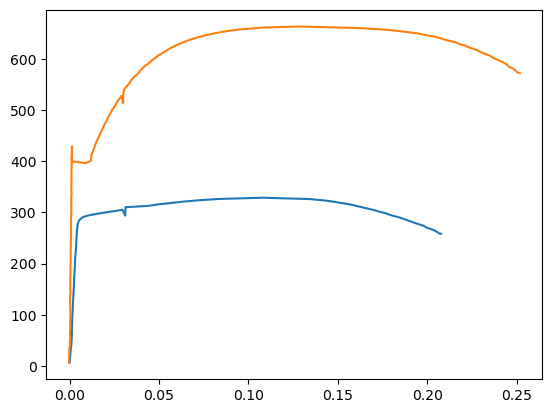

In [6]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, strain_steel, stress_steel)

plt.show()

We will improve our graph by adding labels to individual curves and axes.
| Matplotlib metoda | Popis |	Příklad |
| --- | --- | --- |
| ax.set_xlabel() | x axis title |	plt.xlabel('strain (in/in)') |
| ax.set_ylabel() | y axis title |	plt.ylabel('stress (ksi)') |
| ax.set_title() | 	graph title |	plt.title('Stress Strain Curve') |
| ax.legend() |	legend |	plt.plt(x,y, label='steel') |

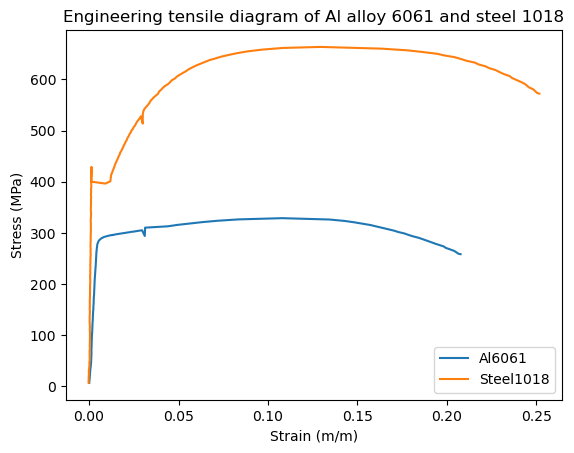

In [7]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_xlabel('Strain (m/m)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Engineering tensile diagram of Al alloy 6061 and steel 1018')
ax.legend(['Al6061','Steel1018'])

plt.show()

Now we can save the graph as a .png image using the ```plt.savefig()``` method of the Matplotlib library. The code below creates the graph and saves the image with the name ``tensile_diagram.png``. The ``dpi=300`` argument inside the ``plt.savefig()`` method specifies the resolution of the saved image. The image will be saved in the ```static``` folder of the same directory as our code.

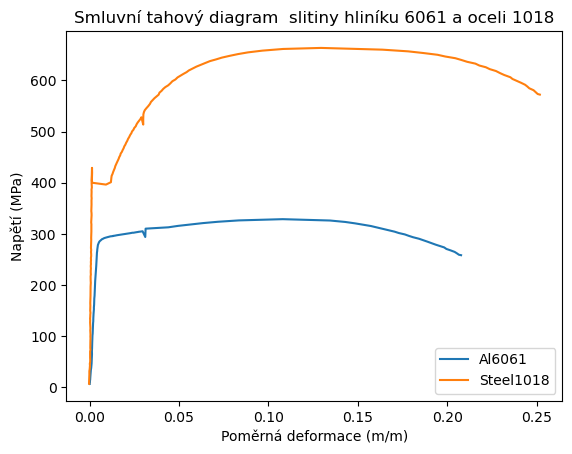

In [8]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, label = 'Al6061')
ax.plot(strain_steel, stress_steel, label = 'Steel1018')

ax.set_xlabel('Poměrná deformace (m/m)')
ax.set_ylabel('Napětí (MPa)')
ax.set_title('Smluvní tahový diagram  slitiny hliníku 6061 a oceli 1018')
ax.legend()

plt.savefig('static/tensile_diagram.png', dpi=300)
plt.show()

# Finding the ultimate strength

The ultimate strength is the point on the graph with the greatest stress value.

In [9]:
uts_steel = np.max(stress_steel)
uts_al = np.max(stress_al)

For the purpose of drawing, we will also add the deformations at which the ultimate strength occurs.

In [10]:
uts_strain_steel = strain_steel[stress_steel==uts_steel][0]
uts_strain_al = strain_al[stress_al==uts_al][0]



print(f'The ultimate strength for Al 6061 je {uts_al} MPa a for strain {uts_strain_al}.')
print(f'The ultimate strength for steel 1018 je {uts_steel} MPa for strain {uts_strain_steel}.')

The ultimate strength for Al 6061 je 328.87169171951257 MPa a for strain 0.10797487258911133.
The ultimate strength for steel 1018 je 663.4758721964481 MPa for strain 0.12940356254577637.


We can add the points to the graph.

.

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Goldman\AppData\Local\Temp\ipykernel_21804\1314038895.py:6: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(uts_strain_al, uts_al, "o", label = '$\sigma_P$ Al6061')
C:\Users\Goldman\AppData\Local\Temp\ipykernel_21804\1314038895.py:7: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(uts_strain_steel, uts_steel, "o", label = '$\sigma_P$ ocel 1018')


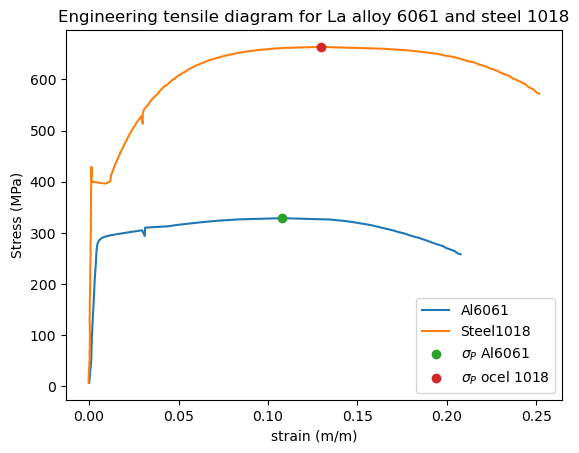

In [11]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, label = 'Al6061')
ax.plot(strain_steel, stress_steel, label = 'Steel1018')

ax.plot(uts_strain_al, uts_al, "o", label = '$\sigma_P$ Al6061')
ax.plot(uts_strain_steel, uts_steel, "o", label = '$\sigma_P$ ocel 1018')


ax.set_xlabel('strain (m/m)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Engineering tensile diagram for La alloy 6061 and steel 1018')
ax.legend()

plt.savefig('static/tensile_diagram1.png', dpi=300)
plt.show()

# Determining Young's modulus

We choose the part of the curve for which the curve is linear. For an aluminum alloy, this will be approximately the area between 0 and 250 MPa and for steel between 0 and 350 MPa.

.

In [12]:
lin_stress_steel = stress_steel[stress_steel<350]
lin_strain_steel = strain_steel[stress_steel<350]

lin_stress_al = stress_al[stress_al<250]
lin_strain_al = strain_al[stress_al<250]

fig,ax = plt.subplots()

ax.plot(lin_strain_al, lin_stress_al, label = 'Al6061')
ax.plot(lin_strain_steel, lin_stress_steel, label = 'Steel1018')

ax.set_xlabel('Strain (m/m)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Engineering tensile diagram for La alloy 6061 and steel 1018')
ax.legend()

In a simple approach, we will use the function of approximating the points by a first degree polynomial.


In [13]:
param_steel = np.polyfit(lin_strain_steel, lin_stress_steel, 1)
param_al = np.polyfit(lin_strain_al, lin_stress_al, 1)

print(f'Steel 1018: Stress = {param_steel[1]} + {param_steel[0]} * Strain')
print(f'Al6061: Stress = {param_al[1]} + {param_al[0]} * Strain')

Steel 1018: Stress = 30.353246542441322 + 267660.3348834687 * Strain
Al6061: Stress = -13.324847526592684 + 68493.00909734139 * Strain


And we get back the fitted data.

In [14]:
fit_stress_steel = np.polyval(param_steel, lin_strain_steel)
fit_stress_al = np.polyval(param_al, lin_strain_al)

fig,ax = plt.subplots()

ax.plot(lin_strain_al, lin_stress_al, label = 'Al6061')
ax.plot(lin_strain_steel, lin_stress_steel, label = 'Steel1018')
ax.plot(lin_strain_al, fit_stress_al,"--" ,label = 'fit Al6061')
ax.plot(lin_strain_steel, fit_stress_steel,"--", label = 'fit Steel1018')

ax.set_xlabel('Strain (m/m)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Engineering tensile diagram for La alloy 6061 and steel 1018')
ax.legend()

The slope of the straight line tells us the value of Young's modulus of elasticity.



In [15]:
print(f'E(ocel 1018) = {param_steel[0]/1000} GPa')
print(f'E(Al6061) = {param_al[0]/1000} GPa')

E(ocel 1018) = 267.6603348834687 GPa
E(Al6061) = 68.49300909734139 GPa


We can compare the results with the results in tables, e.g. [matweb.com](https://www.matweb.com/search/datasheet_print.aspx?matguid=3a9cc570fbb24d119f08db22a53e2421) or [asm.matweb.com](https://asm.matweb.com/search/specificmaterial.asp?bassnum=ma6061t6). Based on our measurements and the values ​​in the tables, we can try to estimate what type of processing of 1018 steel it is.

An alternative is to use more complex curve fitting models, such as the [lmfit](https://lmfit.github.io/lmfit-py/index.html) library.

[[Model]]
    Model(model_hooke)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 91
    # variables        = 1
    chi-square         = 139374.949
    reduced chi-square = 1548.61055
    Akaike info crit   = 669.399783
    Bayesian info crit = 671.910643
    R-squared          = 0.84966458
[[Variables]]
    E:  307574.304 +/- 6556.48153 (2.13%) (init = 0)


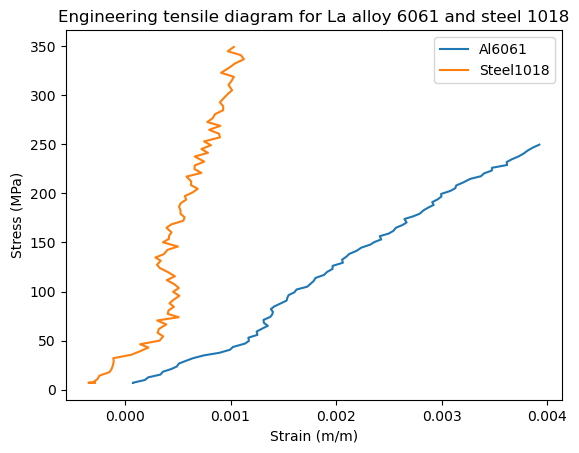

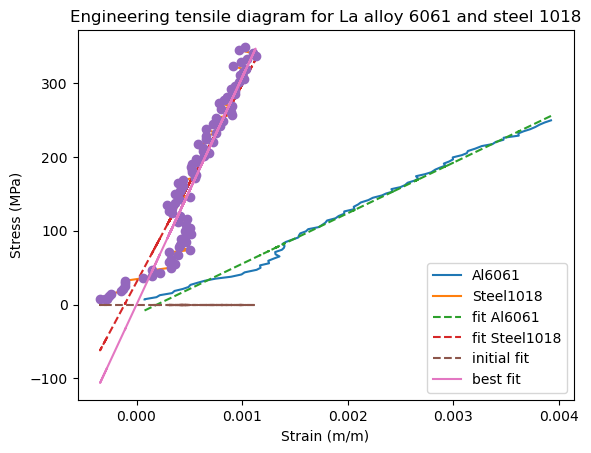

E(steel 1018) = 307.57430351056655 GPa


In [16]:
def model_hooke(epsilon, E):
    return epsilon * E

emodel = Model(model_hooke)

result = emodel.fit(lin_stress_steel, epsilon=lin_strain_steel, E=0*1e3)

print(result.fit_report())

plt.plot(lin_strain_steel, lin_stress_steel, 'o')
plt.plot(lin_strain_steel, result.init_fit, '--', label='initial fit')
plt.plot(lin_strain_steel, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

print(f'E(steel 1018) = {result.params["E"]/1000} GPa')